# Train vs Validation Curve

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("metrics.csv")  
df.head()

,epoch,train_loss,val_loss,val_opening_angle_p16_deg,val_opening_angle_median_deg,val_opening_angle_p84_deg,val_kappa_mean
0,0,NaN,-0.320012,5.150547,11.285643,27.067604,46.534130
1,1,1.308099,-1.168387,2.786147,6.500821,19.799608,78.620209
2,2,-0.944143,-1.353137,2.382792,5.560730,18.631029,83.402550
3,3,-1.298978,-1.423319,2.273717,5.321161,17.804541,74.657806
4,4,-1.395416,-1.471124,2.101667,5.025114,17.333138,84.282387


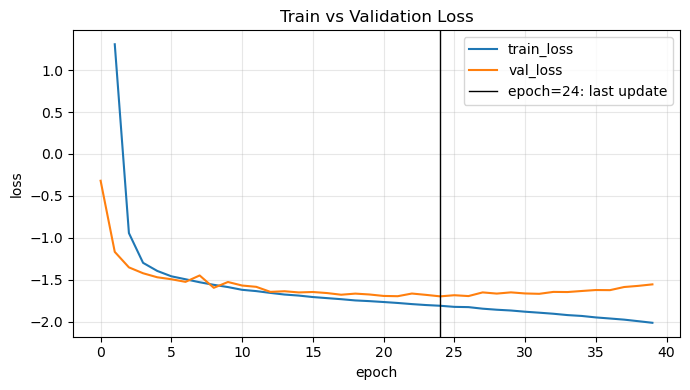

In [6]:
plt.figure(figsize=(7,4))
plt.plot(df["epoch"], df["train_loss"], label="train_loss")
plt.plot(df["epoch"], df["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Train vs Validation Loss")
plt.grid(True, alpha=0.3)
plt.axvline(x=24, color="black", linestyle="-", linewidth=1, label="epoch=24: last update")
plt.legend()
plt.tight_layout()
plt.show()

DL dünyasında **model seçimi için en yaygın olan**:

**1) Validation set üzerindeki performansa göre seçmek**

* En klasik: **min val_loss** (özellikle regression / classification loss’u hedefle iyi örtüşüyorsa)
* Daha “doğru” versiyon: **en iyi val metric** (accuracy/F1/AUC, MAE, vs.)

**Train–val (gap) üzerinden seçmek** ise **2) daha az yaygın ve daha çok teşhis amaçlı**:

* Overfit’i görmek, erken durdurma kararını desteklemek, regularization/LR ayarlamak için bakılır.
* Ama “checkpoint seçimi”ni doğrudan “gap en küçük” gibi bir kurala bağlamak pek tercih edilmez; çünkü gap küçük diye model iyi genelleyecek garantisi yok (ikisi de kötü olabilir → underfit).

Pratikte en çok görülen workflow:

* **Early stopping + best checkpoint by val_loss/val_metric**
* Train–val farkı sadece “eğitim sağlıklı mı?” kontrolü.

Yani iki seçenek arasında: **val_loss üzerinden seçmek** DL dünyasında açık ara daha standart.


# Inference Results